In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

from models.class_network import deep_net

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using {device}")

using cuda


In [2]:
# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [3]:
# Constants

history_step = 15
output_step = 100

In [4]:
# Hyperparameters

batch_size = 128
epochs = 5

In [5]:
# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

print(f"Number of batches: {len(train_dataloader)}")

Number of batches: 469


In [6]:
optimizers = [
    torch.optim.SGD,
    torch.optim.Adam,
    torch.optim.RMSprop
]

lrs = [0.01, 0.001, 0.01]

num_opts = len(optimizers)

In [7]:
from copy import deepcopy
model = deep_net(28*28, 10).to(device)
models = [deepcopy(model) for _ in range(num_opts)]

In [8]:
loss_fn = nn.CrossEntropyLoss()

In [9]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    history = []
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        X = X.reshape(-1, 28 * 28)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss = loss.item()

        if batch % output_step == 0:
            current = batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            

        if batch % history_step == 0:
            history.append(loss)
            
    return history

In [10]:
his = [[] for _ in range(num_opts)]
for i in range(num_opts):
    print(f"Using {optimizers[i].__name__}")
    for t in range(epochs):
        print(f"Epoch {t+1}: ")
        
        loss = train(
            train_dataloader,
            models[i],
            loss_fn,
            optimizers[i](models[i].parameters(), lr=lrs[i]))

        his[i].append(loss)

    print("Done!\n")

Using SGD
Epoch 1: 
loss: 2.297186  [    0/60000]
loss: 2.268377  [12800/60000]
loss: 2.235765  [25600/60000]
loss: 2.189749  [38400/60000]
loss: 2.092800  [51200/60000]
Epoch 2: 
loss: 1.951132  [    0/60000]
loss: 1.771667  [12800/60000]
loss: 1.445658  [25600/60000]
loss: 1.200098  [38400/60000]
loss: 1.046018  [51200/60000]
Epoch 3: 
loss: 0.877496  [    0/60000]
loss: 0.813331  [12800/60000]
loss: 0.652193  [25600/60000]
loss: 0.638175  [38400/60000]
loss: 0.672611  [51200/60000]
Epoch 4: 
loss: 0.568835  [    0/60000]
loss: 0.545312  [12800/60000]
loss: 0.452146  [25600/60000]
loss: 0.485606  [38400/60000]
loss: 0.546706  [51200/60000]
Epoch 5: 
loss: 0.440137  [    0/60000]
loss: 0.438771  [12800/60000]
loss: 0.376767  [25600/60000]
loss: 0.424200  [38400/60000]
loss: 0.490906  [51200/60000]
Done!

Using Adam
Epoch 1: 
loss: 2.297186  [    0/60000]
loss: 0.621112  [12800/60000]
loss: 0.367349  [25600/60000]
loss: 0.326656  [38400/60000]
loss: 0.370011  [51200/60000]
Epoch 2: 
lo

In [11]:
for i in range(num_opts):
    his[i] = torch.tensor(his[i]).reshape(-1)

### Plotting Results

In [12]:
from matplotlib import pyplot as plt

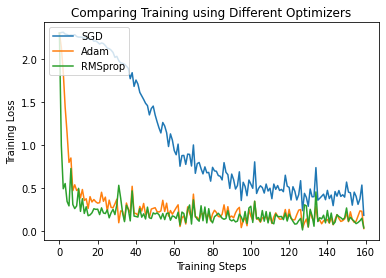

In [13]:
plt.xlabel('Training Steps')
plt.ylabel('Training Loss')
plt.title('Comparing Training using Different Optimizers')
for i in range(num_opts):
    plt.plot(his[i], label=optimizers[i].__name__)

plt.legend(loc="upper left")
plt.show()